In [5]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
train_df = pd.read_csv('datasets/fashion-mnist_train.csv')
test_df = pd.read_csv('datasets/fashion-mnist_test.csv')

In [8]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [10]:
# split the training data into train and validate arrays (will be used later)

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

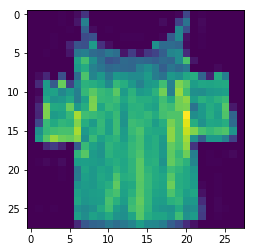

In [11]:
# lets see what the images look like

image = x_train[999, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [16]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols,1)

x_train = x_train.reshape(x_train.shape[0],*im_shape)
x_test = x_test.reshape(x_test.shape[0],*im_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [39]:
name = '1_layer'
cnn_model_1 = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape,name='Conv2D-1'),
    MaxPooling2D(pool_size=2),
    Dropout(0.2,name='Dropout'),
    
    Flatten(name ='Flatten'),
    Dense(32,activation='relu',name = 'Dense'),
    Dense(32,activation='softmax',name = 'Output')
    
],name=name)
name = '2_layer'
cnn_model_2 = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape,name='Conv2D-1'),
    MaxPooling2D(pool_size=2,name='MaxPool'),
    Dropout(0.25,name='Dropout-1'),
    Conv2D(filters=64,kernel_size=3,activation='relu',name='Conv2D-2'),
    Flatten(name ='Flatten'),
    Dense(64,activation='relu',name = 'Dense'),
    Dense(10,activation='softmax',name = 'Output')
    
],name=name)
name = '3_layer'
cnn_model_3 = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape,name='Conv2D-1'),
    MaxPooling2D(pool_size=2,name='MaxPool'),
    Dropout(0.25,name='Dropout-1'),
    Conv2D(filters=64,kernel_size=3,activation='relu',name='Conv2D-2'),
    Dropout(0.25,name='Dropout-2'),
    Conv2D(filters=128,kernel_size=3,activation='relu',name='Conv2D-3'),
    Dropout(0.4,name='Dropout-3'),
    Flatten(name ='Flatten'),
    Dense(128,activation='relu',name = 'Dense'),
    Dropout(0.4,name='Dropout'),
    Dense(10,activation='softmax',name = 'Output')
    
],name=name)
cnn_models=[cnn_model_1,cnn_model_2,cnn_model_3]


In [40]:
for model in cnn_models:
 model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 32)                1056      
Total params: 174,464
Trainable params: 174,464
Non-trainable params: 0
_________________________________________________________________
____

In [25]:
history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history